In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ht=pd.read_csv("height.csv")
ht.head()

,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
0,Boys,1985,5,105.649052,105.159635,106.172846,0.258115
1,Boys,1985,6,111.635352,111.190655,112.078230,0.227526
2,Boys,1985,7,117.189491,116.778453,117.595601,0.210784
3,Boys,1985,8,122.438103,122.054426,122.825657,0.199455
4,Boys,1985,9,127.499794,127.131517,127.885537,0.194522


In [12]:
XT=ht.drop(['Sex','Year','Mean height lower 95% uncertainty interval','Mean height upper 95% uncertainty interval','Mean height standard error'],axis=1)
XT

,Age group,Mean height
0,5,105.649052
1,6,111.635352
2,7,117.189491
3,8,122.438103
4,9,127.499794
...,...,...
1045,15,156.693073
1046,16,157.567922
1047,17,158.026195
1048,18,158.304538


In [13]:
X=XT.iloc[:,:-1].values
X

array([[ 5],
       [ 6],
       [ 7],
       ...,
       [17],
       [18],
       [19]], dtype=int64)

In [14]:
y=XT.iloc[:,-1].values
y

array([105.64905191, 111.63535228, 117.18949082, ..., 158.02619479,
       158.30453766, 158.63826892])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=0)

In [17]:
len(X_train)

840

In [18]:
len(X_test)

210

In [36]:
from sklearn.neighbors import KNeighborsRegressor
rf=KNeighborsRegressor(p=5,n_neighbors=5)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

In [37]:
pred

array([151.43935005, 160.06323419, 162.06382064, 124.19977167,
       113.10057573, 159.13366451, 113.10057573, 166.43840917,
       146.58023615, 107.5725937 , 160.06323419, 134.03501672,
       139.982787  , 134.03501672, 124.19977167, 139.982787  ,
       128.86343261, 159.13366451, 166.43840917, 151.43935005,
       159.13366451, 146.58023615, 134.03501672, 160.50723738,
       134.03501672, 157.31397346, 166.43840917, 157.31397346,
       107.5725937 , 157.31397346, 166.43840917, 157.31397346,
       119.13082452, 166.43840917, 113.10057573, 107.5725937 ,
       113.10057573, 166.43840917, 166.43840917, 119.13082452,
       113.10057573, 124.19977167, 166.43840917, 160.06323419,
       151.43935005, 160.50723738, 124.19977167, 162.06382064,
       159.13366451, 119.13082452, 151.43935005, 162.06382064,
       160.50723738, 107.5725937 , 166.43840917, 124.19977167,
       166.43840917, 107.5725937 , 113.10057573, 107.5725937 ,
       119.13082452, 107.5725937 , 119.13082452, 134.03

In [38]:
y_test

array([150.28385789, 155.3656501 , 156.83711064, 123.20843936,
       115.55002202, 166.08565517, 111.75049199, 156.04759001,
       146.01898987, 109.61789808, 165.55801049, 136.91758879,
       138.14502136, 135.1727165 , 122.81709127, 140.72518535,
       129.48256799, 155.98142088, 156.301172  , 150.85050629,
       155.9368717 , 146.33955502, 134.54300093, 154.39353394,
       134.98010915, 154.20617024, 168.34723511, 157.99503824,
       106.74968094, 152.93662019, 156.02979019, 154.75724956,
       117.02814127, 157.22655511, 111.63535228, 105.94629943,
       114.9509202 , 156.35016638, 157.58196095, 120.76740355,
       113.72727511, 122.59054345, 168.73412621, 167.07681491,
       150.43308916, 154.30939725, 122.46589983, 168.03358716,
       167.82433031, 117.74046308, 150.08767193, 157.87092885,
       164.41947646, 107.26508596, 167.56551408, 124.69713103,
       157.41427112, 105.75889049, 111.67961171, 108.14517792,
       118.68343292, 107.10613916, 117.637021  , 133.43

In [39]:
rf.score(X_test,y_test)

0.9619707805230602

C:\Users\swapnil\AppData\Local\Temp\ipykernel_11724\3819427663.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_val = np.arange(min(X_train),max(X_train),0.01)


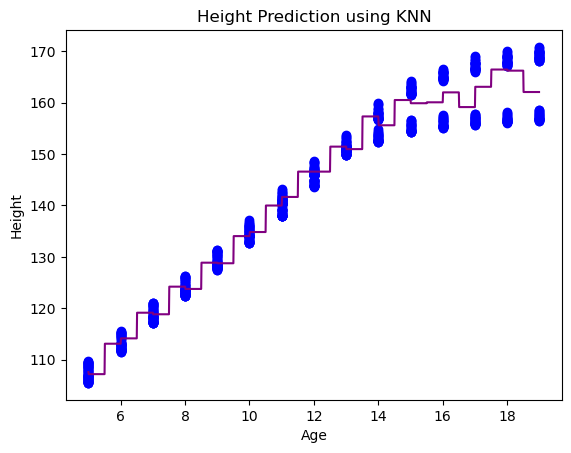

<Figure size 640x480 with 0 Axes>

In [40]:
X_val = np.arange(min(X_train),max(X_train),0.01)
X_val= X_val.reshape((len(X_val),1))
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_val, rf.predict(X_val),color='purple')
plt.title("Height Prediction using KNN")
plt.xlabel("Age")
plt.ylabel("Height")
plt.figure()
plt.show()

In [41]:
ypred=rf.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,ypred)
rmse=np.sqrt(mse)
print("Root mean square :",rmse)
r2_score=r2_score(y_test,ypred)
print("R2score:",r2_score*100)

Root mean square : 3.761849470046792
R2score: 96.19707805230601
